# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Muhammad Hanafi
- Email: hanafim3000@gmail.com
- Id Dicoding: hann_zo

## Menentukan Pertanyaan Bisnis

- Bagaimana kategori produk yang paling banyak dan sedikit terjual pada tahun terdekat?
- Bagaimana demografi pembeli yang melakukan transaksi/order?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data
Dataset yang digunakan dari E-Commerce Public Dataset adalah Customers, Orders, Products, Product Category, & Order Items

In [2]:
customer_df = pd.read_csv("https://raw.githubusercontent.com/hannz0/learning_dataset/master/E-commerce-public-dataset/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
order_df = pd.read_csv("https://raw.githubusercontent.com/hannz0/learning_dataset/master/E-commerce-public-dataset/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
product_df = pd.read_csv("https://raw.githubusercontent.com/hannz0/learning_dataset/master/E-commerce-public-dataset/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
prd_category_df = pd.read_csv("https://raw.githubusercontent.com/hannz0/learning_dataset/master/E-commerce-public-dataset/product_category_name_translation.csv")
prd_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [6]:
order_item_df = pd.read_csv("https://raw.githubusercontent.com/hannz0/learning_dataset/master/E-commerce-public-dataset/order_items_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

#### Menilai tabel Customers

In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
print("Kolom null \n", customer_df.isna().sum())
print("\nJumlah duplikasi: ", customer_df.duplicated().sum())

Kolom null 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah duplikasi:  0


In [9]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


#### Menilai tabel Orders

In [10]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Tipe data pada kolom `'order_purchase_timestamp'`, `'order_approved_at'`, `'order_delivered_carrier_date'`, `'order_delivered_customer_date'`, `'order_estimated_delivery_date'`, pada `order_df` tidak sesuai dengan isi value-nya

In [12]:
print("Kolom null \n", order_df.isna().sum())
print("\nJumlah duplikasi: ", order_df.duplicated().sum())

Kolom null 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Jumlah duplikasi:  0


In [13]:
order_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel Products

In [14]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [15]:
print("Kolom null \n", product_df.isna().sum())
print("\nJumlah duplikasi: ", product_df.duplicated().sum())

Kolom null 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Jumlah duplikasi:  0


In [16]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel Products Category

In [17]:
prd_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [18]:
print("Kolom null \n", prd_category_df.isna().sum())
print("\nJumlah duplikasi: ", prd_category_df.duplicated().sum())

Kolom null 
 product_category_name            0
product_category_name_english    0
dtype: int64

Jumlah duplikasi:  0


In [19]:
prd_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai tabel Order Items

In [20]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Tipe data pada kolom `'shipping_limit_date'`, pada `order_item_df` tidak sesuai dengan isi value-nya

In [22]:
print("Kolom null \n", order_item_df.isna().sum())
print("\nJumlah duplikasi: ", order_item_df.duplicated().sum())

Kolom null 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah duplikasi:  0


In [23]:
order_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Cleaning Data
Pada proses  penilaian sebelumnya, `customer_df` & `prd_category_df` tidak terdapat kejanggalan pada data, tipe data dan value-nya

#### Membersihkan tabel Orders

##### Memperbaiki tipe data


In [24]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [25]:
list(order_df.columns[3:])

['order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [26]:
datetime_columns = list(order_df.columns[3:])

for column in datetime_columns:
  order_df[column] = pd.to_datetime(order_df[column])

In [27]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [28]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


##### Missing values

In [29]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [30]:
order_df.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [31]:
order_df.dropna(axis=0,inplace=True)

Proses `dropna` yang dilakukan akan menghilangkan sebagian `order_status` dari data `order_df`.
Proses ini menyesuaikan dengan pertanyaan bisnis yang diajukan, dan berfokus pada order yang terkirim/diterima pembeli

In [32]:
order_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [33]:
order_df.order_status.value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

#### Membersihkan tabel Products

##### Missing values

In [34]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [35]:
product_df[product_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [36]:
product_df.dropna(axis=0, inplace=True)

In [37]:
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Membersihkan tabel Order Items

##### Memperbaiki tipe data

In [38]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [39]:
order_item_df["shipping_limit_date"] = pd.to_datetime(order_item_df["shipping_limit_date"])

In [40]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [41]:
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## Exploratory Data Analysis (EDA)

### Explore `customer_df`

In [42]:
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
82816,85ac32af92e4e38adeaeb0653a085dfd,c7d664db71d9fb2fa89e83f896d8dc24,21073,rio de janeiro,RJ
31256,c0d48da3a52a85f4159b10d3fe81c557,13114b7039d1178989356b1199b3cd90,22030,rio de janeiro,RJ
76975,78b9900a0ff9d195d133d376c34b08c4,8b4447c69feb2b408e29edc0fe9d0253,31260,belo horizonte,MG
84308,cbd53fe27a0d896fa630df7abf038203,4c5200f7d135c94fcd304cdd0af9837a,22031,rio de janeiro,RJ
7592,603d1bd1f37caeb4169f53c033dd8f08,56b9775c996d724559df1e39839ac963,86701,arapongas,PR


In [43]:
customer_df['customer_id'] = customer_df['customer_id'].unique()

In [44]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [45]:
customer_df.customer_id.is_unique

True

In [46]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [47]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore `order_df`

In [48]:
order_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
40122,7f0cc9a8528cca2dc63cddba3940474f,1c41109ed8f74a322ea436af44c6c03f,delivered,2017-07-18 23:55:46,2017-07-19 22:23:58,2017-07-21 16:59:26,2017-07-28 18:52:06,2017-08-09
38469,4b99a000045d86380d5b014642fbc499,a6d0826873e7fd69267d460a167a51e9,delivered,2018-06-29 12:41:16,2018-06-29 12:50:17,2018-07-03 14:56:00,2018-07-13 16:58:35,2018-08-06
34182,aae245e2849c2032f94d4baad11dab79,41e0fc4b66cb6cfe6dadaea3129a08f3,delivered,2018-02-28 11:09:27,2018-02-28 12:01:43,2018-02-28 22:05:27,2018-03-08 12:21:49,2018-03-19
76771,8d90375388c45e7773231b09986b40da,3f244eb4a15e626a8fee14bc089303c9,delivered,2017-08-17 18:43:18,2017-08-18 18:44:22,2017-08-22 17:45:12,2017-08-24 20:40:11,2017-08-30
86717,5f04f4d6318ce8bdd9043545285b4def,f5d9940e5da79a1324329fa16246e012,delivered,2017-10-09 08:46:23,2017-10-09 08:56:24,2017-10-13 18:52:01,2017-10-17 15:57:43,2017-10-31


In [49]:
order_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,95939,88272,80100,95649,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96455,3,9,47,3,507
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [50]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [51]:
delivery_time = order_df["order_delivered_customer_date"] - order_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df["delivery_day"] = round(delivery_time/86400)

In [52]:
order_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_day
26969,7b73889e40574f23f35f71c026fb141c,ae9b61a69c752fc15eb4944d0c7f0544,delivered,2018-03-31 12:09:11,2018-03-31 12:50:20,2018-04-06 00:34:40,2018-04-10 23:41:30,2018-04-17,10.0
32361,047f9a218bccce8342d77f72c2240f8a,b2027e001d7cd8107cec9f7123f43930,delivered,2017-04-22 17:20:56,2017-04-22 17:35:20,2017-04-24 09:48:55,2017-04-29 09:14:12,2017-05-15,7.0
72867,04c377db9e026afed8d38404a910c00f,40f1bbcb789024d217509ad89d2dd556,delivered,2018-02-18 20:18:36,2018-02-18 20:30:31,2018-02-21 18:27:21,2018-03-07 18:06:38,2018-03-16,17.0
18184,0bb5af1f3b46e6ec23dd85506fa8175f,2f73503d3f3d923095acec18ce04c30e,delivered,2017-11-09 13:22:06,2017-11-09 13:35:31,2017-11-10 17:51:37,2017-11-22 16:40:36,2017-12-15,13.0
552,df8e5e994bcc820fcf403f9a875201e6,05f1c2a8e913a4084727ac728bbdbec2,delivered,2018-08-01 13:30:12,2018-08-01 13:44:25,2018-08-02 14:20:00,2018-08-06 22:28:21,2018-08-17,5.0


In [53]:
order_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_day
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,95939,88272,80100,95649,445,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00,NaN
freq,1,1,96455,3,9,47,3,507,NaN
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.517007
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.550354
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000


In [54]:
order_df[order_df.delivery_day == order_df.delivery_day.max()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_day
19590,ca07593549f1816d26a572e06dc1eab6,75683a92331068e2d281b11a7866ba44,delivered,2017-02-21 23:31:27,2017-02-23 02:35:15,2017-03-08 13:47:46,2017-09-19 14:36:39,2017-03-22,210.0


<Axes: >

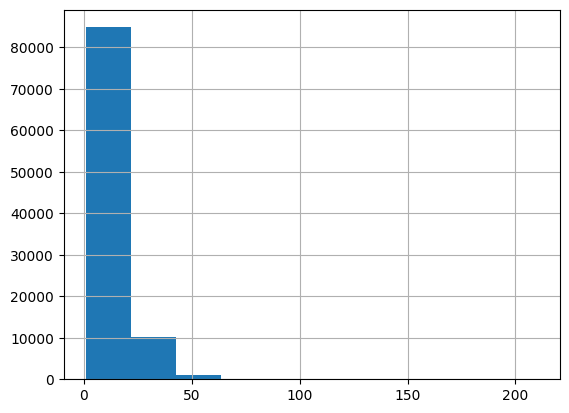

In [55]:
order_df.delivery_day.hist()

In [56]:
customer_df['status'] = customer_df['customer_id'].isin(order_df['customer_id']).map({True: 'Active', False: 'Non-Active'})
customer_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
67833,34e961b4e51f96d51c1f907ad95c2525,3dfc036a6c20bf007f7365b74961a9ae,96815,santa cruz do sul,RS,Active
17978,4aa821f5896619516a18776c7df1c143,bb839bd3c374396ae2e1489db25fc253,37200,lavras,MG,Active
93628,ca9e43d2589e04a0608d8989d5c5452d,8f062a3d9b2c79e29cc3d8db301b6d39,4316,sao paulo,SP,Active
36317,61db6421e5fab4bba7bd2db218fba49c,1c628081cb579ed6035b9aa8614e69f4,14057,ribeirao preto,SP,Active
47423,2cba5fc83f8a83c775a94950777c5c92,911280528998d9751748c78944c8447b,9550,sao caetano do sul,SP,Active
87485,83ad2f780fb78cef1d84812445321f71,f9814e08df56fd4bf7e52db6c2dfbc13,4929,sao paulo,SP,Active
15662,2c294c9fdd5d9b63c26e6fb27a39475e,267b84731b0571ff7fd18af01fcef751,63870,boa viagem,CE,Active
78814,c386ca94c617d6f14d009fd2a1204380,481ca89097584ac46ced01f2ab16b0ef,4520,sao paulo,SP,Active
33188,db073abf8c93f928f9cefd125bac461f,017fa9ba22880652e440025a91d5a66b,29149,cariacica,ES,Active
23354,e24c95c7fcea91f9d8e06c7b2a139301,63a1a412f0d9ea81fb487dec2851d1c1,20720,rio de janeiro,RJ,Active


In [57]:
customer_df.groupby(by="status").customer_id.count()

status
Active        96461
Non-Active     2980
Name: customer_id, dtype: int64

#### Menggabungkan data `customer_df` dan `order_df`

In [58]:
orders_customer_df = pd.merge(
    left=order_df,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customer_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [59]:
print("Kolom null \n", orders_customer_df.isna().sum())
print("\nJumlah duplikasi: ", orders_customer_df.duplicated().sum())

Kolom null 
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_day                     0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
status                           0
dtype: int64

Jumlah duplikasi:  0


In [60]:
orders_customer_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15044
rio de janeiro            6603
belo horizonte            2697
brasilia                  2071
curitiba                  1489
campinas                  1406
porto alegre              1341
salvador                  1188
guarulhos                 1143
sao bernardo do campo      911
Name: order_id, dtype: int64

In [61]:
orders_customer_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    40489
RJ    12351
MG    11352
RS     5342
PR     4923
SC     3547
BA     3256
DF     2080
ES     1995
GO     1957
PE     1593
CE     1278
PA      946
MT      886
MA      716
MS      701
PB      517
PI      476
RN      474
AL      397
SE      335
TO      274
RO      243
AM      145
AC       80
AP       67
RR       41
Name: order_id, dtype: int64

### Explore `product_df`

In [62]:
product_df.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
2726,2cab5fb805c35e09a71fc411c7849ec2,brinquedos,55.0,816.0,4.0,1000.0,37.0,35.0,25.0
27406,dc1b575cdc26817d8826b684dec47b7c,bebes,51.0,324.0,1.0,500.0,33.0,18.0,26.0
10040,635c4d1abbc47f87a51cec367caeccdf,fashion_bolsas_e_acessorios,52.0,566.0,1.0,100.0,22.0,2.0,19.0
7195,e90ed53e840b695011804e816dc3bdd6,utilidades_domesticas,44.0,918.0,1.0,20100.0,42.0,63.0,42.0
19319,214d074d545a9cedee55284805a1335f,moveis_decoracao,58.0,737.0,3.0,1500.0,43.0,9.0,43.0
27075,48b099f6925c19d46ed5f013267681c2,cama_mesa_banho,55.0,134.0,3.0,650.0,27.0,10.0,23.0
8749,f23cdc558b71542ad82b3b7722248ac6,brinquedos,50.0,1102.0,1.0,400.0,17.0,4.0,12.0
24281,ac3f48d9dfd6ebdf8e871702ee91ee83,moveis_decoracao,49.0,1371.0,6.0,900.0,36.0,6.0,26.0
21037,4cac1a12a6fe9ffba4a9556dbe582e28,automotivo,46.0,365.0,1.0,200.0,16.0,5.0,20.0
4352,3706bfca98c324436c9037eb9b35f594,cama_mesa_banho,58.0,362.0,1.0,200.0,26.0,6.0,19.0


In [63]:
product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [64]:
new_product_df = pd.merge(
    product_df,
    prd_category_df,
    on="product_category_name"
)
new_product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [65]:
print("Kolom null \n", new_product_df.isna().sum())
print("\nJumlah duplikasi: ", new_product_df.duplicated().sum())

Kolom null 
 product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

Jumlah duplikasi:  0


In [66]:
new_product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32327 entries, 0 to 32326
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32327 non-null  object 
 1   product_category_name          32327 non-null  object 
 2   product_name_lenght            32327 non-null  float64
 3   product_description_lenght     32327 non-null  float64
 4   product_photos_qty             32327 non-null  float64
 5   product_weight_g               32327 non-null  float64
 6   product_length_cm              32327 non-null  float64
 7   product_height_cm              32327 non-null  float64
 8   product_width_cm               32327 non-null  float64
 9   product_category_name_english  32327 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.7+ MB


In [67]:
new_product_df.product_category_name_english.value_counts()

bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
fashion_childrens_clothes       5
home_comfort_2                  5
security_and_services           2
cds_dvds_musicals               1
Name: product_category_name_english, Length: 71, dtype: int64

In [68]:
new_product_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique"
})

,product_id
product_category_name_english,
agro_industry_and_commerce,74
air_conditioning,124
art,55
arts_and_craftmanship,19
audio,58
...,...
stationery,849
tablets_printing_image,9
telephony,1134


### Explore `order_item_df`

In [69]:
order_item_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112287,ff1581e08b3011021e7c7de592ddc81e,1,566a4f2c4385f36d15c00dfcaae132d1,8b321bb669392f5163d04c59e235e066,2018-03-27 22:50:25,21.9,8.29
100410,e3a6058779988efb31c8de43676a8783,1,2e830c73f28d3b8542af03cf2637dfc4,8b321bb669392f5163d04c59e235e066,2018-03-12 14:55:59,11.6,8.40
95505,d89b3f3e37df53791ceeef1e4e653310,1,12a146749cb72ebfde01a89105df1897,e9779976487b77c6d4ac45f75ec7afe9,2018-06-19 11:55:11,29.0,25.72
2951,06a3bd42be69cdf39cd785d311b54a45,1,bb57d3e2c056ffaa1f31ee222dd81ee3,2be17df1c49978426251562096c3cc09,2017-09-26 15:55:40,149.9,15.80
45164,66a488ea7c0b8cea6ee72116130ec501,1,817e1c2d22418c36386406ccacfa53e8,624f4ece8da4aafb77699233d480f8ef,2018-04-19 02:11:09,159.0,31.94


In [70]:
order_item_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [71]:
order_item_df.order_item_id.value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

In [72]:
order_item_df.groupby(by="order_item_id").agg({
    "order_id": "nunique",
    "price": ["sum","min","max"]
})

order_id        price               
               nunique          sum   min      max
order_item_id                                     
1                98666  12428396.31  0.85  6735.00
2                 9803    837725.68  0.85  2299.95
3                 2287    178396.37  1.20  1790.00
4                  965     74539.65  1.20  1790.00
5                  460     34758.51  1.20  1680.00
6                  256     19498.37  1.20  1680.00
7                   58      5841.29  1.20  1680.00
8                   36      4347.61  1.20  1680.00
9                   28      2249.97  1.20   284.99
10                  25      2039.23  1.20   284.99
11                  17      1022.50  1.20   179.99
12                  13       663.77  1.20   108.00
13                   8       435.37  1.20   100.00
14                   7       405.38  1.20   100.00
15                   5       316.39  1.20   100.00
16                   3       199.90  1.20   100.00
17                   3       199.90  1.20   100.00
18                   3       199.90  1.20   100.00
19                   3       199.90  1.20   100.00
20                   3       199.90  1.20   100.00
21                   1         7.80  7.80     7.80

In [73]:
new_order_item_df = pd.merge(
    left=order_item_df,
    right=new_product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
    )
new_order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [74]:
print("Kolom null \n", new_order_item_df.isna().sum())
print("\nJumlah duplikasi: ", new_order_item_df.duplicated().sum())

Kolom null 
 order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1628
product_name_lenght              1628
product_description_lenght       1628
product_photos_qty               1628
product_weight_g                 1628
product_length_cm                1628
product_height_cm                1628
product_width_cm                 1628
product_category_name_english    1628
dtype: int64

Jumlah duplikasi:  0


In [75]:
new_order_item_df.dropna(axis=0,inplace=True)

In [76]:
new_order_item_df.groupby(by="product_category_name_english").agg({
    "order_item_id": "nunique",
    "price": ["sum","min","max"]
})

order_item_id       price                
                                    nunique         sum    min      max
product_category_name_english                                          
agro_industry_and_commerce                6    72530.47  12.99  2990.00
air_conditioning                          7    55024.96  10.90  1599.00
art                                       6    24202.64   3.50  6499.00
arts_and_craftmanship                     2     1814.01   9.80   289.49
audio                                     3    50688.50  14.90   598.99
...                                     ...         ...    ...      ...
stationery                                6   230943.23   2.29  1693.00
tablets_printing_image                    2     7528.41  14.90   889.99
telephony                                14   323667.53   5.00  2428.00
toys                                      6   483946.60   4.90  1699.99
watches_gifts                            12  1205005.68   8.99  3999.90

[71 rows x 4 columns]

### Explore all data

#### Menghubungkan semua data

In [77]:
all_df = pd.merge(
    left=new_order_item_df,
    right=orders_customer_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,Active
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,Active
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,Active
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,Active
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,Active


In [78]:
print("Kolom null \n", all_df.isna().sum())
print("\nJumlah duplikasi: ", all_df.duplicated().sum())

Kolom null 
 order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
product_category_name_english       0
customer_id                      2401
order_status                     2401
order_purchase_timestamp         2401
order_approved_at                2401
order_delivered_carrier_date     2401
order_delivered_customer_date    2401
order_estimated_delivery_date    2401
delivery_day                     2401
customer_unique_id               2401
customer_zip_code_prefix         2401

In [79]:
all_df.dropna(axis=0,inplace=True)

In [80]:
all_df.order_status.value_counts()

delivered    108614
canceled          7
Name: order_status, dtype: int64

In [81]:
all_df.status.value_counts()

Active    108621
Name: status, dtype: int64

In [82]:
all_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
count,108621,108621.000000,108621,108621,108621,108621.000000,108621.000000,108621,108621.000000,108621.000000,...,108621,108621,108621,108621,108621.000000,108621,108621.000000,108621,108621,108621
unique,95110,NaN,31614,2912,90113,NaN,NaN,71,NaN,NaN,...,87113,78910,94322,445,NaN,92063,NaN,4073,27,1
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,cama_mesa_banho,NaN,NaN,...,2018-02-24 03:20:27,2018-05-09 15:48:00,2017-07-31 18:03:02,2017-12-20 00:00:00,NaN,c8460e4251689ba205045f3ea17884a1,NaN,sao paulo,SP,Active
freq,21,NaN,520,1996,21,NaN,NaN,10952,NaN,NaN,...,23,48,21,593,NaN,24,NaN,17118,45803,108621
first,NaN,NaN,NaN,NaN,2016-09-19 23:11:33,NaN,NaN,NaN,NaN,NaN,...,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN,...,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.198645,NaN,NaN,NaN,120.061447,19.982794,NaN,48.806400,787.320334,...,NaN,NaN,NaN,NaN,12.427284,NaN,35146.780392,NaN,NaN,NaN
std,NaN,0.708595,NaN,NaN,NaN,181.989608,15.734297,NaN,10.008958,651.377311,...,NaN,NaN,NaN,NaN,9.439200,NaN,29891.103684,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,5.000000,4.000000,...,NaN,NaN,NaN,NaN,1.000000,NaN,1003.000000,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,42.000000,348.000000,...,NaN,NaN,NaN,NaN,7.000000,NaN,11310.000000,NaN,NaN,NaN


In [83]:
all_df.groupby(by=["customer_city","product_category_name_english"]).agg({
    "product_category_name_english": "count",
    "price": ['sum','min','max']
})

product_category_name_english  \
                                                                          count   
customer_city       product_category_name_english                                 
abadia dos dourados books_general_interest                                    1   
                    cool_stuff                                                1   
                    sports_leisure                                            1   
abadiania           small_appliances                                          1   
abaete              baby                                                      1   
...                                                                         ...   
ze doca             food_drink                                                1   
                    garden_tools                                              1   
                    musical_instruments                                       1   
                    sports_leisure                                            1   
zortea              computers_accessories                                     1   

                                                    price                  
                                                      sum     min     max  
customer_city       product_category_name_english                          
abadia dos dourados books_general_interest          39.90   39.90   39.90  
                    cool_stuff                     199.00  199.00  199.00  
                    sports_leisure                 120.00  120.00  120.00  
abadiania           small_appliances               949.99  949.99  949.99  
abaete              baby                            65.00   65.00   65.00  
...                                                   ...     ...     ...  
ze doca             food_drink                      65.00   65.00   65.00  
                    garden_tools                    39.90   39.90   39.90  
                    musical_instruments            359.00  359.00  359.00  
                    sports_leisure                 149.90  149.90  149.90  
zortea              computers_accessories           69.90   69.90   69.90  

[24891 rows x 4 columns]

In [84]:
all_df.groupby(by=["customer_state","product_category_name_english"]).agg({
    "product_category_name_english": "count",
    "price": ['sum','min','max']
})

product_category_name_english  \
                                                                     count   
customer_state product_category_name_english                                 
AC             auto                                                      4   
               baby                                                      3   
               bed_bath_table                                            4   
               books_general_interest                                    2   
               christmas_supplies                                        1   
...                                                                    ...   
TO             sports_leisure                                           25   
               stationery                                                3   
               telephony                                                21   
               toys                                                     13   
               watches_gifts                                            29   

                                                price                  
                                                  sum     min     max  
customer_state product_category_name_english                           
AC             auto                            540.98   45.00  285.00  
               baby                            697.84  119.90  388.00  
               bed_bath_table                  567.70   99.90  219.90  
               books_general_interest          633.80  108.90  524.90  
               christmas_supplies               69.90   69.90   69.90  
...                                               ...     ...     ...  
TO             sports_leisure                 5144.32   27.68  999.99  
               stationery                      276.80   29.90  149.00  
               telephony                      1268.12   14.90  364.98  
               toys                           1864.15   29.90  599.90  
               watches_gifts                  4920.89   29.00  799.00  

[1351 rows x 4 columns]

In [85]:
all_df.groupby(by=["customer_city","product_category_name_english"]).agg({
    "product_category_name_english": "count",
    "freight_value": ['sum','min','max']
})

product_category_name_english  \
                                                                          count   
customer_city       product_category_name_english                                 
abadia dos dourados books_general_interest                                    1   
                    cool_stuff                                                1   
                    sports_leisure                                            1   
abadiania           small_appliances                                          1   
abaete              baby                                                      1   
...                                                                         ...   
ze doca             food_drink                                                1   
                    garden_tools                                              1   
                    musical_instruments                                       1   
                    sports_leisure                                            1   
zortea              computers_accessories                                     1   

                                                  freight_value                
                                                            sum    min    max  
customer_city       product_category_name_english                              
abadia dos dourados books_general_interest                18.38  18.38  18.38  
                    cool_stuff                            20.63  20.63  20.63  
                    sports_leisure                        15.59  15.59  15.59  
abadiania           small_appliances                      75.53  75.53  75.53  
abaete              baby                                  17.70  17.70  17.70  
...                                                         ...    ...    ...  
ze doca             food_drink                            38.00  38.00  38.00  
                    garden_tools                          26.61  26.61  26.61  
                    musical_instruments                   49.04  49.04  49.04  
                    sports_leisure                        38.60  38.60  38.60  
zortea              computers_accessories                 20.98  20.98  20.98  

[24891 rows x 4 columns]

In [86]:
all_df.groupby(by=["customer_state","product_category_name_english"]).agg({
    "product_category_name_english": "count",
    "freight_value": ['sum','min','max']
})

product_category_name_english  \
                                                                     count   
customer_state product_category_name_english                                 
AC             auto                                                      4   
               baby                                                      3   
               bed_bath_table                                            4   
               books_general_interest                                    2   
               christmas_supplies                                        1   
...                                                                    ...   
TO             sports_leisure                                           25   
               stationery                                                3   
               telephony                                                21   
               toys                                                     13   
               watches_gifts                                            29   

                                             freight_value                 
                                                       sum    min     max  
customer_state product_category_name_english                               
AC             auto                                 120.93  25.49   42.38  
               baby                                 174.13  27.69  108.36  
               bed_bath_table                       157.51  36.16   41.26  
               books_general_interest               123.71  53.12   70.59  
               christmas_supplies                    60.95  60.95   60.95  
...                                                    ...    ...     ...  
TO             sports_leisure                      1309.99  15.30  293.27  
               stationery                            73.80  21.67   26.89  
               telephony                            627.34  17.35   52.46  
               toys                                 423.96  19.04   53.88  
               watches_gifts                        921.06  17.78   54.48  

[1351 rows x 4 columns]

In [87]:
all_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,order_id,price
customer_state,,
SP,39943,5001779.71
RJ,12167,1736774.47
MG,11185,1533021.39
RS,5264,717177.87
PR,4855,657744.28
SC,3492,500165.47
BA,3214,487638.67
DF,2050,293919.59
GO,1911,274306.59


In [88]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

In [89]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.set_theme(context="talk")
sns.set_style("whitegrid", {'axes.edgecolor': '.6','axes.grid': False,'xtick.bottom': True,'ytick.left': True})

### Bagaimana kategori produk yang paling banyak dan sedikit terjual pada tahun terdekat?
jumlah penjualan produk didasarkan dari jumlah `order_id` yang terekam pada tahun terdekat yaitu tahun 2018 sesuai data

In [90]:
order_recently_df = all_df[all_df['order_purchase_timestamp'].dt.year == 2018].sort_values(by="order_purchase_timestamp")

In [91]:
order_recently_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
34558,4f6daad34df49e10c8072b33faafcb2a,1,468a4d241243dd96169888c0ad022086,e067ad2c1c0b48758eb1b5228bcf7a68,2018-01-05 02:58:25,148.0,36.36,pet_shop,53.0,886.0,...,2018-01-01 02:58:25,2018-01-05 18:36:58,2018-01-30 18:43:20,2018-02-05,30.0,1014f90d8a2b105b55da659d50f73625,57015.0,maceio,AL,Active
1910,0462bad26ccfb8508951beb9ea398ae1,1,d93d7e81a8d724c4ef661e75647cf325,5a93f3ab0ef4c84ed5e1b5dbf23978bc,2018-01-15 08:48:19,151.2,18.31,bebes,50.0,158.0,...,2018-01-01 08:48:19,2018-01-02 17:42:48,2018-01-23 18:15:19,2018-02-09,22.0,9443ba3216ed3d0c97bc6f688b181e3b,29600.0,afonso claudio,ES,Active
109266,fbe41a4974e4a492e085d90e5be0b3e3,1,a096400f2b6fbe9c868f7dd5f1333e5a,cbd996ad3c1b7dc71fd0e5f5df9087e2,2018-01-09 08:55:31,43.2,11.85,esporte_lazer,54.0,814.0,...,2018-01-01 08:55:31,2018-01-02 22:33:59,2018-01-05 14:18:41,2018-01-29,4.0,0b204f7a8ce8a7b5575b7e5861e3d3ef,12215.0,sao jose dos campos,SP,Active
44981,67a98eaf984ba84c596f9f5456634f20,1,c4baedd846ed09b85f78a781b522f126,a1043bafd471dff536d0c462352beb48,2018-01-05 09:46:25,139.0,50.84,ferramentas_jardim,58.0,1893.0,...,2018-01-01 09:46:25,2018-01-02 20:44:41,2018-01-13 00:43:32,2018-02-01,12.0,011785063c56f2c239064f603bf02a05,72872.0,valparaiso de goias,GO,Active
54188,7d0a0773edc4bdca0ef6ab55777718a7,1,be5679ce5a2343c40455223d7bef6dfb,643214e62b870443ccbe55ab29a4dccf,2018-01-09 04:14:33,99.0,7.95,fashion_bolsas_e_acessorios,24.0,540.0,...,2018-01-03 04:14:33,2018-01-05 20:54:35,2018-01-09 13:13:33,2018-01-18,8.0,8e0d53bac62a9ff14875b57413d6e265,2998.0,sao paulo,SP,Active


In [92]:
product_sales_df = order_recently_df.groupby("product_category_name_english").order_id.count().sort_values(ascending=False).reset_index()
product_sales_df.rename(columns={
    "product_category_name_english": "category",
    "order_id": "qty"
}, inplace=True)
product_sales_df.head(10)

,category,qty
0,health_beauty,5842
1,bed_bath_table,5810
2,computers_accessories,4621
3,sports_leisure,4436
4,furniture_decor,4051
5,housewares,3969
6,watches_gifts,3626
7,auto,2580
8,telephony,2293
9,garden_tools,1849


In [93]:
product_sales_df.sort_values(by="qty", ascending=True).head(10)

,category,qty
69,cds_dvds_musicals,1
68,fashion_childrens_clothes,3
67,la_cuisine,4
66,fashion_sport,5
65,home_comfort_2,10
64,fashio_female_clothing,16
63,furniture_mattress_and_upholstery,19
62,arts_and_craftmanship,22
61,tablets_printing_image,22
60,flowers,25


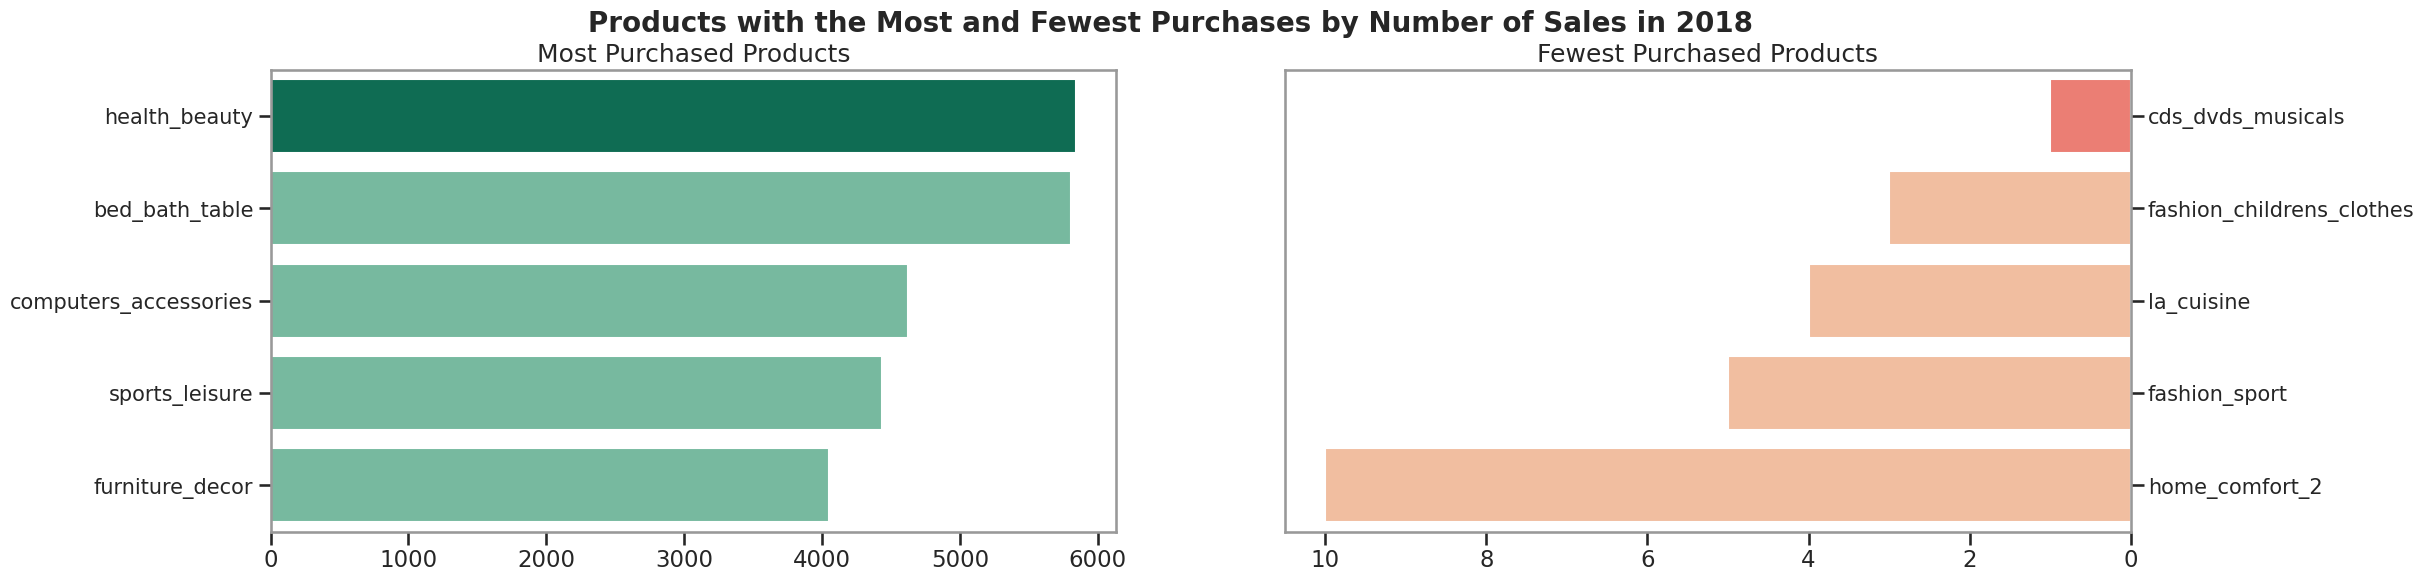

In [94]:
best_clr = ["#007B5A", "#6CC4A1", "#6CC4A1", "#6CC4A1", "#6CC4A1", "#6CC4A1", "#6CC4A1", "#6CC4A1", "#6CC4A1", "#6CC4A1"]
fewest_clr = ["#FF6D60", "#FFBA92", "#FFBA92", "#FFBA92", "#FFBA92", "#FFBA92", "#FFBA92", "#FFBA92", "#FFBA92", "#FFBA92"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
sns.barplot(x="qty", y="category", data=product_sales_df.head(5), palette=best_clr, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Most Purchased Products", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="qty", y="category", data=product_sales_df.sort_values(by="qty", ascending=True).head(5), palette=fewest_clr, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Fewest Purchased Products", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Products with the Most and Fewest Purchases by Number of Sales in 2018", fontsize=20, fontweight='bold')
plt.show()

Hasil perolehan berdasarkan dari angka penjualan produk paling dicari atau dibeli oleh customer adalah kategori produk kencantikan (**Health_Beauty**) dengan total penjualan sebanyak **5842** item dan produk yang kurang diminati atau dicari oleh customer adalah kategori produk **CD/DVD Music** dengan penjualan hanya **1** item

### Bagaimana demografi pembeli yang melakukan transaksi/order?
Demografi customer didasarkan dari jumlah `customer_id` yang terekam pada tahun terdekat yaitu tahun 2018 sesuai data di Kota dan Negara Bagian masing-masing

#### Berdasarkan Kota

In [95]:
bycity_df = order_recently_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "total_customer"
}, inplace=True)
bycity_df

,customer_city,total_customer
0,abadia dos dourados,2
1,abadiania,1
2,abaete,5
3,abaetetuba,7
4,abaiara,1
...,...,...
3243,xexeu,1
3244,xinguara,5
3245,xique-xique,2
3246,ze doca,2


In [96]:
bycity_df.sort_values(by='total_customer', ascending=False)

,customer_city,total_customer
2835,sao paulo,8789
2484,rio de janeiro,3342
363,belo horizonte,1503
445,brasilia,1179
910,curitiba,844
...,...,...
1605,juti,1
1603,jussara,1
1602,juscimeira,1
1601,juruti,1


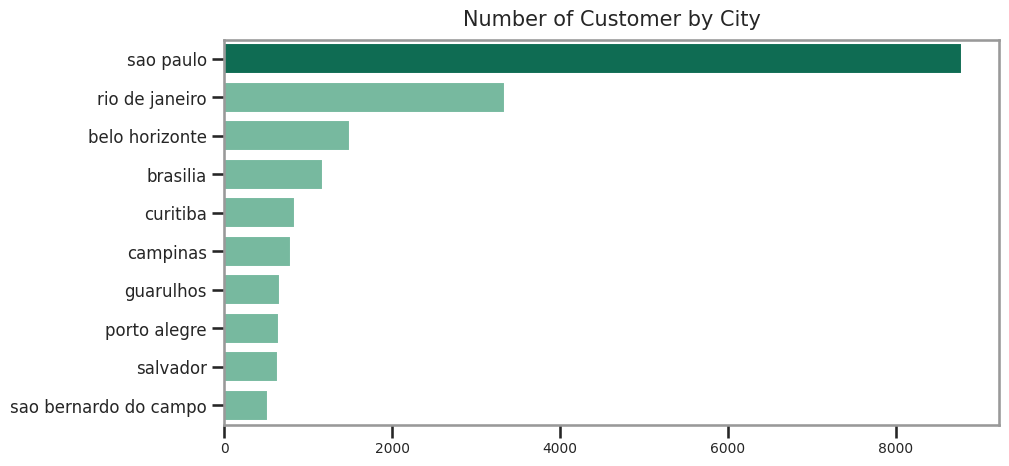

In [97]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x="total_customer",
    y="customer_city",
    data=bycity_df.sort_values(by="total_customer", ascending=False).head(10),
    palette=best_clr
)
plt.title("Number of Customer by City", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Dari seluruh data pada kolom `customer_city`, 10 kota teratas ditampilkan dan Kota Sao Paolo menjadi kota yang memliki transaksi/order customer tertinggi mencapai angka 8789 customer

#### Berdasarkan Negara Bagian

In [98]:
bystate_df = order_recently_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "total_customer"
}, inplace=True)
bystate_df

,customer_state,total_customer
0,AC,27
1,AL,196
2,AM,72
3,AP,39
4,BA,1705
5,CE,628
6,DF,1179
7,ES,1041
8,GO,1008
9,MA,345


In [99]:
bystate_df.sort_values(by="total_customer", ascending=False).head(10),

(   customer_state  total_customer
 25             SP           23100
 18             RJ            6285
 10             MG            6008
 22             RS            2690
 17             PR            2677
 23             SC            1849
 4              BA            1705
 6              DF            1179
 7              ES            1041
 8              GO            1008,)

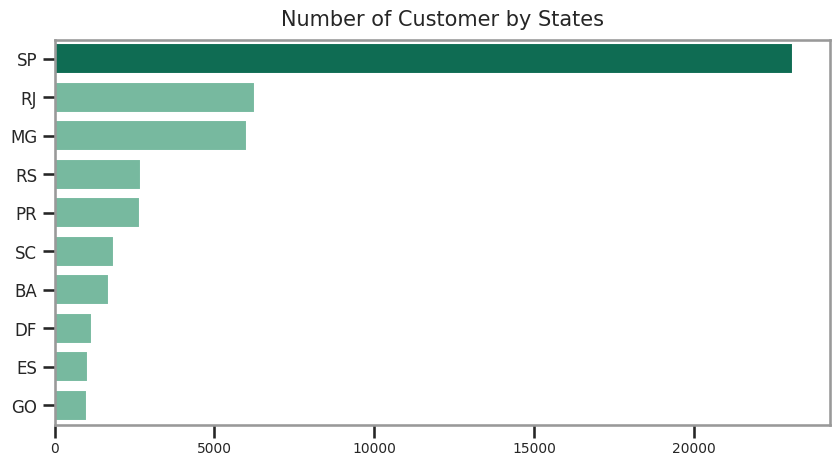

In [100]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x="total_customer",
    y="customer_state",
    data=bystate_df.sort_values(by="total_customer", ascending=False).head(10),
    palette=best_clr
)
plt.title("Number of Customer by States", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Dari seluruh data pada kolom `customer_city`, 10 Negara Bagian teratas ditampilkan dan Negara Bagian dengan kode SP menjadi negara bagian yang memliki transaksi/order customer tertinggi mencapai 23100 customer

### RFM Analysis


In [101]:
order_recently_df.order_purchase_timestamp.max()

Timestamp('2018-08-29 15:00:37')

In [102]:
rfm_df = order_recently_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.0
1,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,1,34.3
2,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1,1107.0
3,0005aefbb696d34b3424dccd0a0e9fd0,2018-06-20 09:46:53,1,134.9
4,00066ccbe787a588c52bd5ff404590e3,2018-02-06 16:10:09,1,199.6


In [103]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = order_recently_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.0,149
1,000419c5494106c306a97b5635748086,2018-03-02,1,34.3,180
2,000598caf2ef4117407665ac33275130,2018-08-11,1,1107.0,18
3,0005aefbb696d34b3424dccd0a0e9fd0,2018-06-20,1,134.9,70
4,00066ccbe787a588c52bd5ff404590e3,2018-02-06,1,199.6,204


In [104]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,000379cdec625522490c315e70c7a9fb,1,93.0,149
1,000419c5494106c306a97b5635748086,1,34.3,180
2,000598caf2ef4117407665ac33275130,1,1107.0,18
3,0005aefbb696d34b3424dccd0a0e9fd0,1,134.9,70
4,00066ccbe787a588c52bd5ff404590e3,1,199.6,204


In [105]:
rfm_df.describe()

,frequency,monetary,recency
count,52185.0,52185.000000,52185.000000
mean,1.0,136.857098,122.784689
std,0.0,203.186616,69.064480
min,1.0,0.850000,0.000000
25%,1.0,45.900000,63.000000
50%,1.0,87.000000,125.000000
75%,1.0,149.900000,183.000000
max,1.0,7160.000000,240.000000


In [106]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
17116,54365416b7ef5599f54a6c7821d5d290,1,99.00,0
46577,e450a297a7bc6839ceb0cf1a2377fa02,1,63.90,0
27974,898b7fee99c4e42170ab69ba59be0a8b,1,84.99,0
46949,e60df9449653a95af4549bbfcb18a6eb,1,418.00,0
17621,56b1ac2855cc6d7950b4ffa6a9b41b0d,1,109.90,0


In [107]:
rfm_recency = rfm_df.sort_values(by="recency", ascending=True).head(5).copy()
rfm_recency['customer_id'] = rfm_recency.index

In [108]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,000379cdec625522490c315e70c7a9fb,1,93.00,149
34794,aa7a0ff82aeeeeec79a4e7431f28d6ca,1,174.56,178
34784,aa69109c4c174abc3b890804f78d78fc,1,18.90,134
34785,aa6bbe83912aa4d9762752cf237ac30e,1,28.50,47
34786,aa6c06fc582aea2912edc17eea2be533,1,19.99,103


In [109]:
rfm_frequency = rfm_df.sort_values(by="frequency", ascending=False).head(5).copy()
rfm_frequency['customer_id'] = rfm_frequency.index

In [110]:
rfm_df.sort_values(by="monetary", ascending=False).head(5)

,customer_id,frequency,monetary,recency
48228,ec5b2ba62e574342386871631fafd3fc,1,7160.00,45
49902,f48d464a0baaea338cb25f816991ab1f,1,6729.00,35
12587,3d979689f636322c62418b6346b1c6d2,1,4590.00,68
41870,cc803a2c412833101651d3f90ca7de24,1,4400.00,90
5504,1afc82cd60e303ef09b4ef9837c9505c,1,4399.87,26


In [111]:
rfm_monetary = rfm_df.sort_values(by="monetary", ascending=False).head(5).copy()
rfm_monetary['customer_id'] = rfm_monetary.index

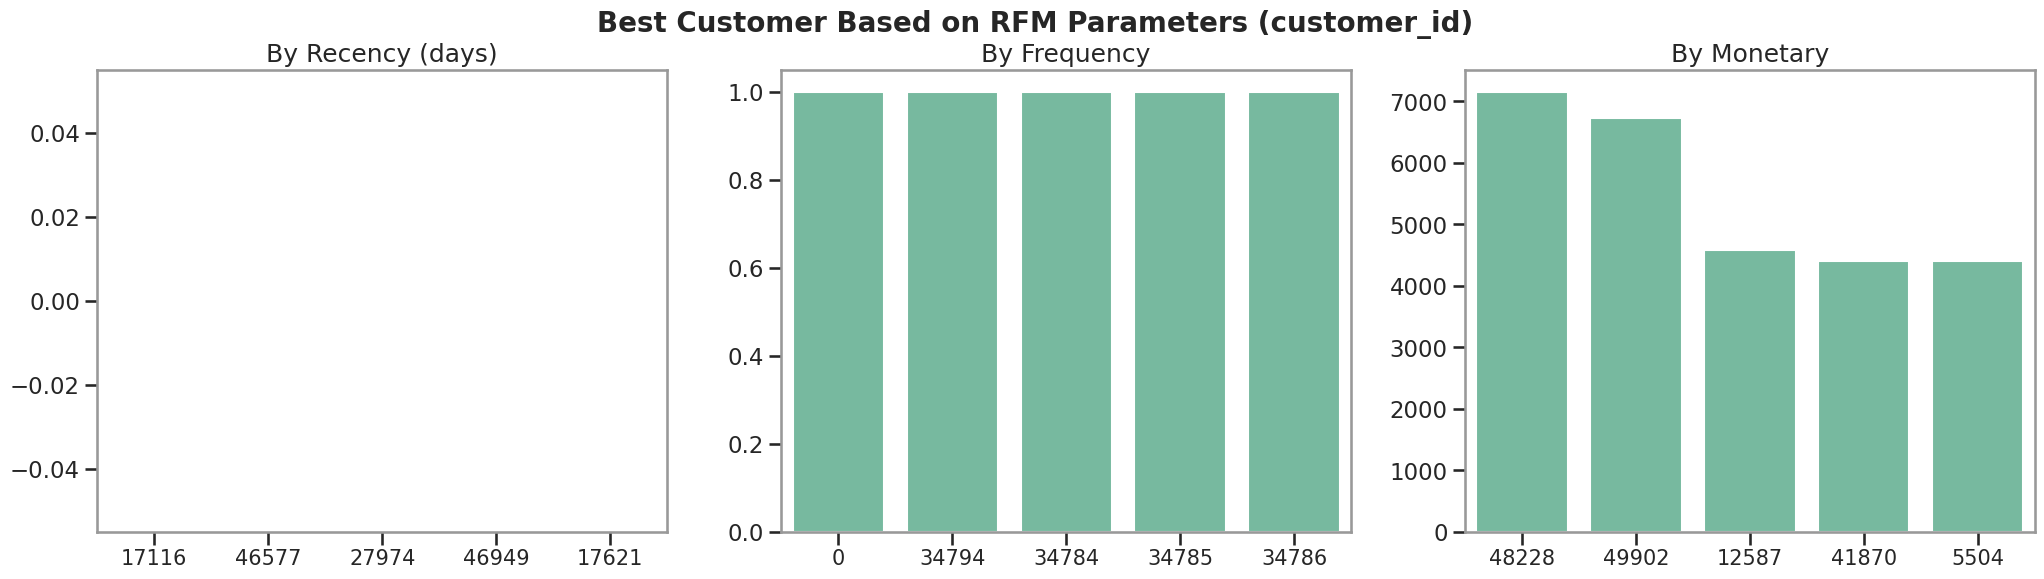

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

colors = ["#6CC4A1", "#6CC4A1", "#6CC4A1", "#6CC4A1", "#6CC4A1"]

sns.barplot(y="recency", x="customer_id", data=rfm_recency, order=list((rfm_recency.index)), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_frequency, order=list((rfm_frequency.index)), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_monetary, order=list((rfm_monetary.index)), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20, fontweight='bold')
plt.show()

#### Segmentasi customer berdasarkan RFM_score

In [113]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,000379cdec625522490c315e70c7a9fb,1,93.0,149,20569.5,26093.0,27677.0
1,000419c5494106c306a97b5635748086,1,34.3,180,13745.0,26093.0,8815.5
2,000598caf2ef4117407665ac33275130,1,1107.0,18,48910.5,26093.0,51805.0
3,0005aefbb696d34b3424dccd0a0e9fd0,1,134.9,70,37676.0,26093.0,36458.5
4,00066ccbe787a588c52bd5ff404590e3,1,199.6,204,8099.5,26093.0,43981.5


In [114]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,000379cdec625522490c315e70c7a9fb,1,93.0,149,39.420276,100.0,53.036313
1,000419c5494106c306a97b5635748086,1,34.3,180,26.341510,100.0,16.892785
2,000598caf2ef4117407665ac33275130,1,1107.0,18,93.734189,100.0,99.271821
3,0005aefbb696d34b3424dccd0a0e9fd0,1,134.9,70,72.203910,100.0,69.863946
4,00066ccbe787a588c52bd5ff404590e3,1,199.6,204,15.522231,100.0,84.279966


In [125]:
rfm_df['RFM_score'] = 0.2*rfm_df['r_rank_norm']+0.5 * rfm_df['f_rank_norm']+0.3*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,000379cdec625522490c315e70c7a9fb,3.69
1,000419c5494106c306a97b5635748086,3.02
2,000598caf2ef4117407665ac33275130,4.93
3,0005aefbb696d34b3424dccd0a0e9fd0,4.27
4,00066ccbe787a588c52bd5ff404590e3,3.92
5,000fd45d6fedae68fc6676036610f879,3.42
6,001028b78fd413e19704b3867c369d3a,3.14


In [135]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
            rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,000379cdec625522490c315e70c7a9fb,3.69,Medium value customer
1,000419c5494106c306a97b5635748086,3.02,Medium value customer
2,000598caf2ef4117407665ac33275130,4.93,Top customers
3,0005aefbb696d34b3424dccd0a0e9fd0,4.27,Medium value customer
4,00066ccbe787a588c52bd5ff404590e3,3.92,Medium value customer
5,000fd45d6fedae68fc6676036610f879,3.42,Medium value customer
6,001028b78fd413e19704b3867c369d3a,3.14,Medium value customer
7,00104a47c29da701ce41ee52077587d9,3.29,Medium value customer
8,001051abfcfdbed9f87b4266213a5df1,3.58,Medium value customer
9,0012a5c13793cf51e253f096a7e740dd,4.18,Medium value customer


In [136]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df.rename(columns={
    "customer_id": "total_customer"
}, inplace=True)
customer_segment_df

,customer_segment,total_customer
0,Low value customers,4562
1,Medium value customer,43404
2,Top customers,4219


In [139]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
     "Low value customers", "Medium value customer","Top customers"
])

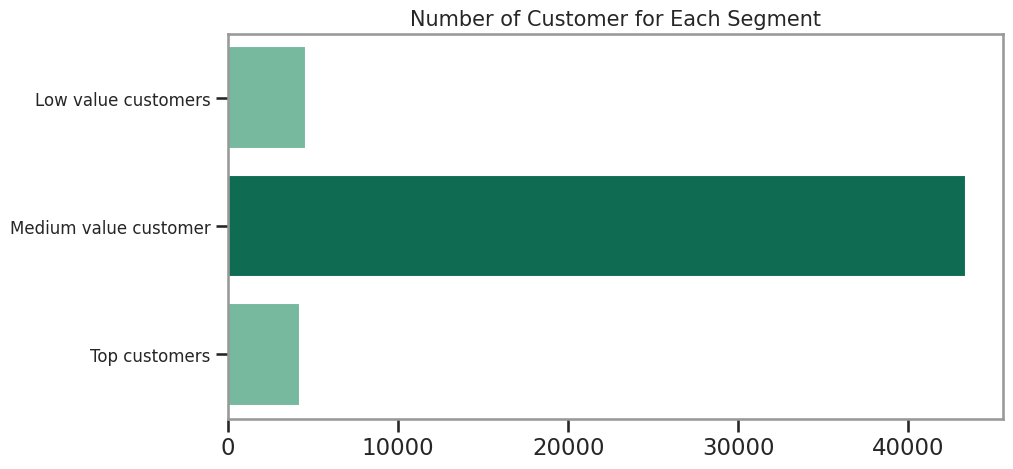

In [156]:
plt.figure(figsize=(10, 5))
colors_ = ["#6CC4A1", "#007B5A", "#6CC4A1"]

sns.barplot(
    x="total_customer",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [141]:
segment_bycity_df = pd.merge(
    left=rfm_df,
    right=order_recently_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
segment_bycity_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm,RFM_score,customer_segment,order_id,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,000379cdec625522490c315e70c7a9fb,1,93.0,149,39.42,100.0,53.04,3.69,Medium value customer,0ab7fb08086d4af9141453c91878ed7a,...,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18,11.0,0b83f73b19c2019e182fd552c048a22c,4841.0,sao paulo,SP,Active
1,000419c5494106c306a97b5635748086,1,34.3,180,26.34,100.0,16.89,3.02,Medium value customer,07f6c3baf9ac86865b60f640c4f923c6,...,2018-03-03 14:10:38,2018-03-07 21:07:51,2018-04-17 17:17:34,2018-03-22,46.0,14843983d4a159080f6afe4b7f346e7c,24220.0,niteroi,RJ,Active
2,000598caf2ef4117407665ac33275130,1,1107.0,18,93.73,100.0,99.27,4.93,Top customers,9b961b894e797f63622137ff7eb1c1af,...,2018-08-11 12:25:08,2018-08-13 14:41:00,2018-08-20 18:18:41,2018-09-06,9.0,7e0516b486e92ed3f3afdd6d1276cfbd,35540.0,oliveira,MG,Active
3,0005aefbb696d34b3424dccd0a0e9fd0,1,134.9,70,72.20,100.0,69.86,4.27,Medium value customer,263ba12390d0fbce329dd16da8cd20f8,...,2018-06-20 10:21:32,2018-06-21 15:17:00,2018-06-22 17:58:39,2018-07-03,2.0,616309b2eeb7bd9c05b0fdfbab28e6c6,3052.0,sao paulo,SP,Active
4,00066ccbe787a588c52bd5ff404590e3,1,199.6,204,15.52,100.0,84.28,3.92,Medium value customer,728416b0db65935dbf78a0cc03e8d6f8,...,2018-02-08 07:49:51,2018-02-14 19:58:58,2018-02-21 22:22:17,2018-03-12,15.0,15090f48004f3b0fc18a167ef82af4db,93525.0,novo hamburgo,RS,Active


In [142]:
segment_bycity_df.customer_segment.value_counts()

Medium value customer    49421
Top customers             5498
Low value customers       4722
Name: customer_segment, dtype: int64

In [149]:
best_segment  =segment_bycity_df[segment_bycity_df.customer_segment == 'Top customers']

In [150]:
best_segment_bycity = best_segment.groupby("customer_city").customer_id.count().sort_values(ascending=False).reset_index()
best_segment_bycity.rename(columns={
    "customer_id": "total_customer"
}, inplace=True)
best_segment_bycity.head(10)

,customer_city,total_customer
0,sao paulo,837
1,rio de janeiro,357
2,belo horizonte,130
3,brasilia,123
4,porto alegre,90
5,curitiba,78
6,guarulhos,71
7,salvador,67
8,campinas,66
9,niteroi,55


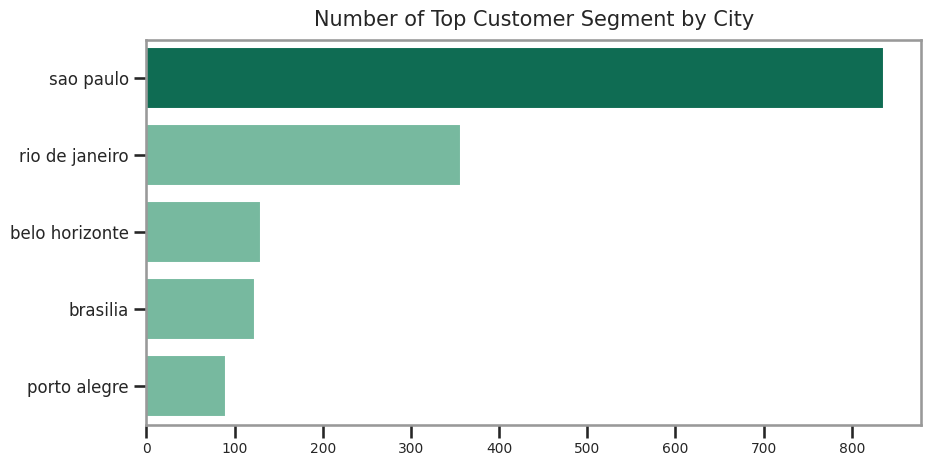

In [151]:
plt.figure(figsize=(10, 5))

sns.barplot(x="total_customer", y="customer_city", data=best_segment_bycity.head(5), palette=best_clr)
plt.title("Number of Top Customer Segment by City", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- **Conclusion pertanyaan 1**: Berdasarkan hasil perolehan berdasarkan penjualan kategori produk yang banyak terjual yaitu produk kencantikan (**Health_Beauty**) dengan total penjualan sebanyak 5842 item dan produk yang sedikit terjual yaitu produk **CD/DVD Music** dengan penjualan hanya **1** item. <br>
Para seller dapat menentukan kategori produk yang akan dijual ditahun berikutnya dengan mulai melakukan penjualan produk **kecantikan** lewat platform e-commerce mereka, dan untuk kepada seller yang sedang menjual produk kategori **CD/DVD Music** dapat mengganti produk tersebut karena kurang diminati customer.
- **Conclusion pertanyaan 2**: Demografi customer berdasarkan kota yang paling sering melakukan order pada e-commerce yaitu Kota **Sao Paolo** sebanyak 8789 customer dan berdasarkan negara bagian yang paling sering melakukan order dengan kode **SP** sebanyak 23100.<br>
Sistem penjualan produk bersifat online atau e-commerce hasil ini mungkin kurang berarti namun berdasarkan analisis ini dapat dibuat untuk para seller apabila ingin membuka store offline di lokasi demografi tersebut.